# Lab 2

Purusharth Malik

2348542

We will be completing the assignment with the help of a dataset extracted from kaggle.

The dataset can be found here: <a href='https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction'>Airlines Customer Satisfaction</a>

## Importing the dataset and making first impressions

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Invistico_Airline.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [24]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Some features like `Flight Distance` may require scaling as it is in a significantly higher range than the rest of the data.

In [25]:
df.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [26]:
df['Customer Type'].unique(), df['Gender'].unique()

(array(['Loyal Customer', 'disloyal Customer'], dtype=object),
 array(['Female', 'Male'], dtype=object))

In [27]:
df['Type of Travel'].unique(), df.Class.unique()

(array(['Personal Travel', 'Business travel'], dtype=object),
 array(['Eco', 'Business', 'Eco Plus'], dtype=object))

`Type of Travel`, `satisfaction`, `Gender` and `Customer Type` are binary data and have to be treated as such.

`Class` feature also has to be encoded as it takes on 3 unique values.

In [28]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

393 out of a total of 129880 is not a very significant number. Therefore, instead of filling the null values, we will drop them.

In [29]:
df.dropna(inplace=True)

In [30]:
# Binarizing the data
from sklearn.preprocessing import LabelBinarizer

def binarize(col_names):
    lb = LabelBinarizer()
    for _ in col_names:
        df[_] = lb.fit_transform(df[_])
        
bin_cols = [_ for _ in df.columns if len(df[_].unique()) == 2]

binarize(bin_cols)

In [31]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,65,1,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,47,1,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,0,15,1,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,0,60,1,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,0,70,1,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [32]:
# Encoding the Class feature
order = {'Eco':1, 'Eco Plus':2, 'Business':3}
df.Class = df.Class.apply(lambda x: order[x])

In [33]:
#Dropping the outliers and scaling flight distance feature
from scipy.stats import zscore
df = df.drop(df[abs(zscore(df['Flight Distance']))>3].index)
df['Flight Distance'] = zscore(df['Flight Distance'])

## EDA

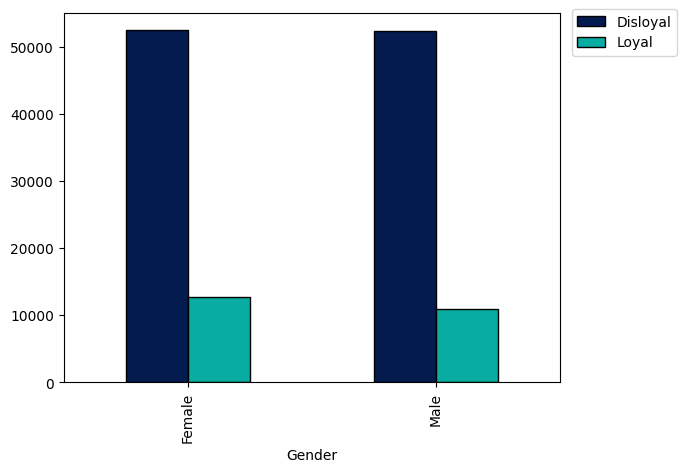

In [100]:
#plotting the number of disloyal and loyal people based on gender
df.groupby(['Gender', 'Customer Type']).count().unstack().satisfaction.plot(kind='bar', color=[ '#041B50', '#08ACA0'], edgecolor='#000000')
plt.legend(['Disloyal', 'Loyal'], bbox_to_anchor=(1.25,1.028))
plt.xticks([0,1], ['Female', 'Male'])
plt.show()

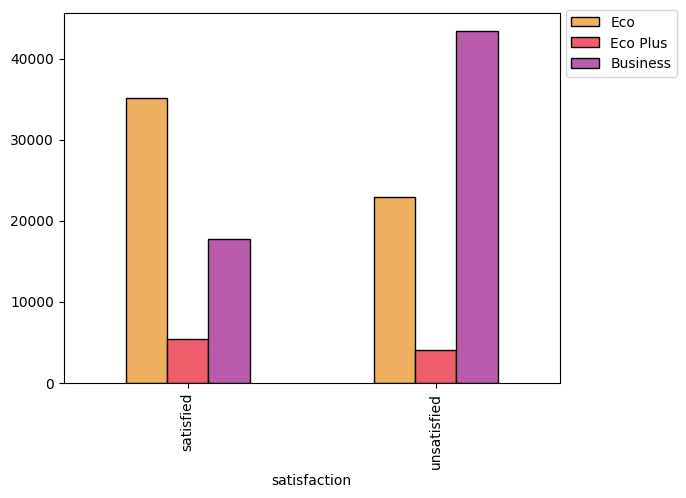

In [98]:
#Plotting satisfied customers along with their classes
df.groupby(['satisfaction', 'Class']).count()['Gender'].unstack().plot(kind='bar', color=['#eeaf61', '#ee5d6c', '#ba5bab'], edgecolor='#000000')
plt.legend(order, bbox_to_anchor=(1.25, 1.028))
plt.xticks([0, 1], ['satisfied', 'unsatisfied'])
plt.show()

In [13]:
# Looking at the features that have strong correlation with the target variable
abs(df.corr()['satisfaction'])>0.25

satisfaction                          True
Gender                               False
Customer Type                         True
Age                                  False
Type of Travel                       False
Class                                 True
Flight Distance                      False
Seat comfort                         False
Departure/Arrival time convenient    False
Food and drink                       False
Gate location                        False
Inflight wifi service                False
Inflight entertainment                True
Online support                        True
Ease of Online booking                True
On-board service                      True
Leg room service                      True
Baggage handling                      True
Checkin service                       True
Cleanliness                           True
Online boarding                       True
Departure Delay in Minutes           False
Arrival Delay in Minutes             False
Name: satis

## Binning

We will be binning the age column here.

In [14]:
#Range of Age
df.Age.min(), df.Age.max()

(7, 85)

We will create bins like `<18, 18-25, 26-35, 36-45, 46-55, >55`.

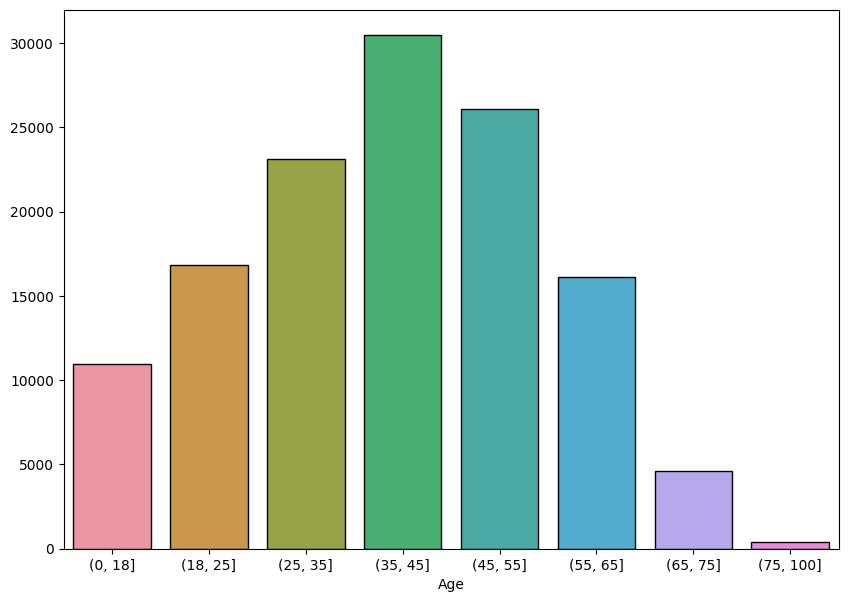

In [106]:
plt.figure(figsize=(10, 7))
bins = pd.cut(df.Age, [0, 18, 25, 35, 45, 55, 65, 75, 100], precision=0)
sns.set_palette("viridis")
sns.barplot(y = bins.value_counts().values, x = bins.value_counts().index, edgecolor='black')
plt.show()

Clearly, people from the age group of 35-45 are the most frequent fliers.

## Calculating the covariance matrix

We will calculate the covariance between `Age` and `Flight Distance` after scaling `Age`.

In [16]:
scaled_age = zscore(df.Age)
cov_age_dist = np.cov(scaled_age, df['Flight Distance'])
cov_age_dist

array([[ 1.00000777, -0.24795152],
       [-0.24795152,  1.00000777]])

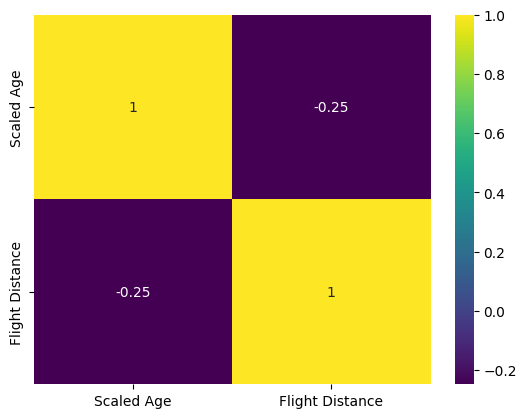

In [107]:
sns.heatmap(cov_age_dist, annot=True, cmap='viridis', xticklabels=['Scaled Age', 'Flight Distance'], yticklabels=['Scaled Age', 'Flight Distance'])
plt.show()

The 2 variables have negative covariance which indicates that increment or decrement in one is reflected inversely in the other one i.e. as the age increases, the flight distance of a person tends to shorten.

## Chi-Square for variable dependency

For all the categorical variables, we will perform a chi-square test of independence in order to check which attributes have a statistically significant p-value i.e. which attributes are strongly associated with the target variable.

For all the features, we will propose the null hypotheses to be that there is no association between the target variable and the feature variable.

$$H_{0}\text{ : There is no significant association between the two variables.}$$
$$H_{a}\text{ : There is a significant association between the two variables (be it positive or negative)}$$

In [108]:
#Choosing columns for chi-square
df.dtypes

satisfaction                           int32
Gender                                 int32
Customer Type                          int32
Age                                    int64
Type of Travel                         int32
Class                                  int64
Flight Distance                      float64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [121]:
cat_cols = df.drop(['satisfaction', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1).columns

In [124]:
from sklearn.feature_selection import chi2
chi_vals = chi2(df[cat_cols], df.satisfaction)

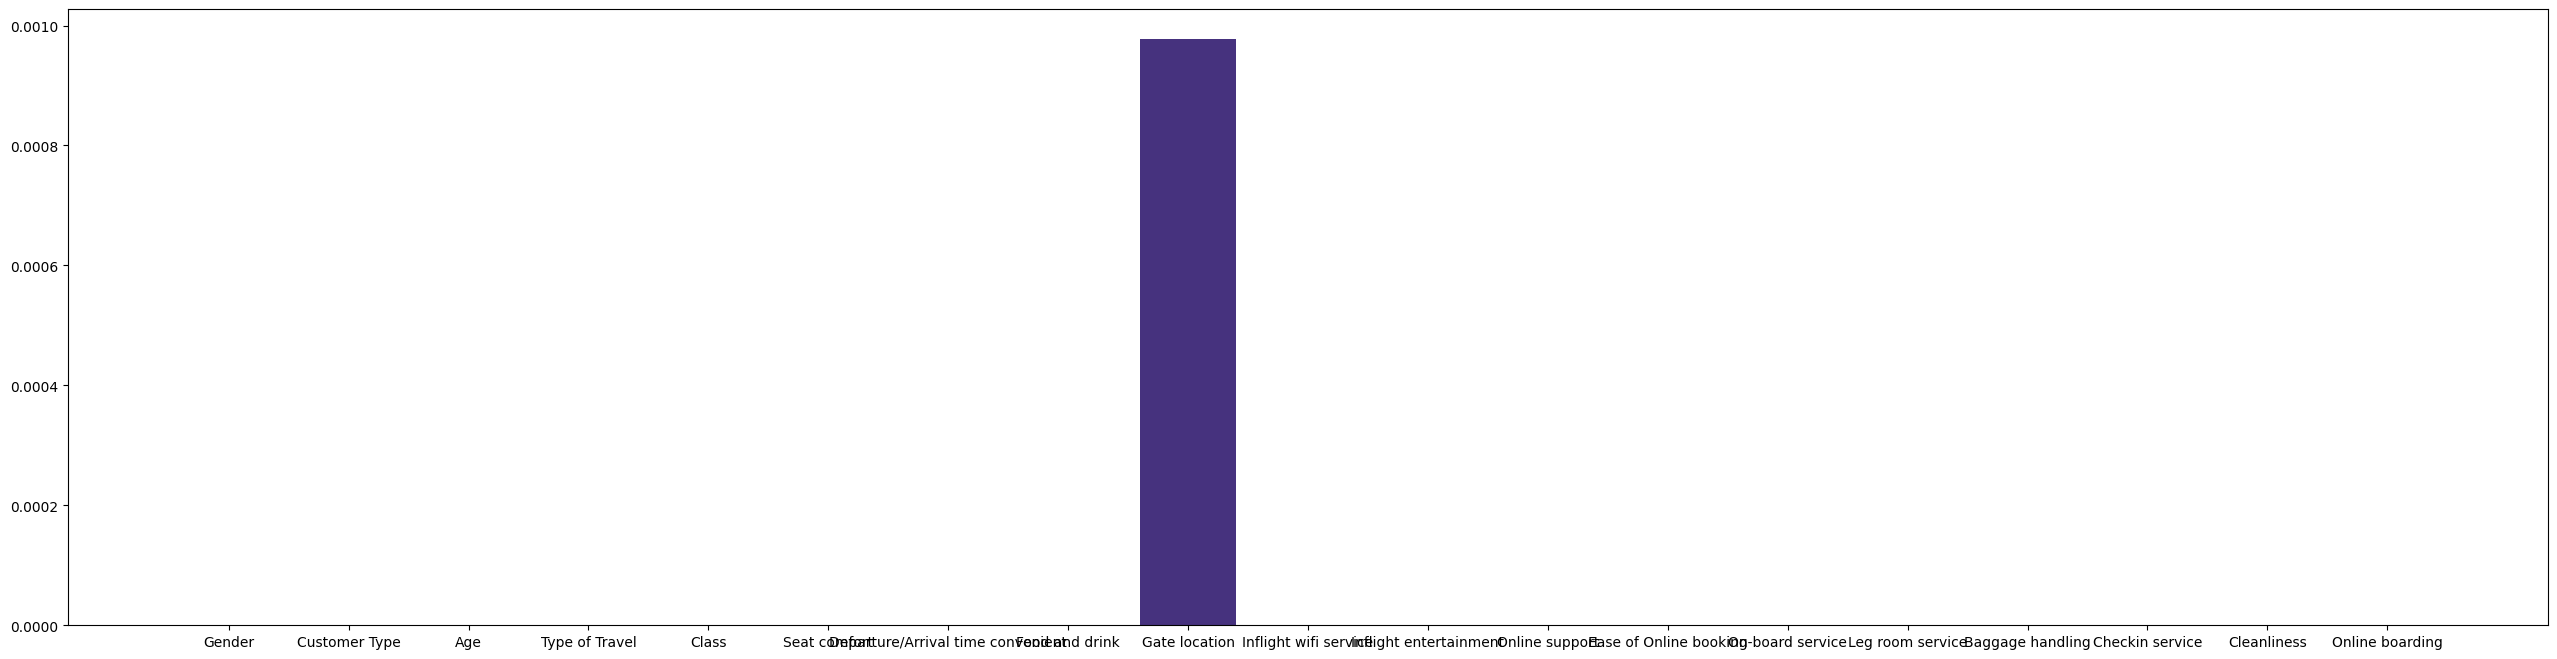

In [132]:
plt.figure(figsize=(32, 8))
p_vals = pd.Series(chi_vals[1],index = cat_cols)
plt.bar(cat_cols, p_vals)
plt.show()

Therefore, for the case of `Gate Location`, it looks like the p-value is not critical but looking at the y-axis, we can clearly see that the p-value is significant and therefore we will fail to reject the null hypothesis.

## Student's t-test for Flight Distance and Satisfaction

$$H_{0}\text{ : The difference between the group means is 0.}$$
$$H_{a}\text{ : The difference between the group means is not 0.}$$

In [146]:
from scipy.stats import ttest_ind

fd = df['Flight Distance']
ttest_ind(fd[df['satisfaction']==0], fd[df['satisfaction']==1])

Ttest_indResult(statistic=16.3064307475573, pvalue=1.0200257604451315e-59)

The negative statistic value here indicates that the sample mean is less than the population mean. Since the p-value is less than 0.05, we will reject the null hypotheses.

To validate the results, let's look at the mean values:

In [147]:
means = df.groupby('satisfaction').mean()['Flight Distance']
means

satisfaction
0    0.049878
1   -0.041350
Name: Flight Distance, dtype: float64

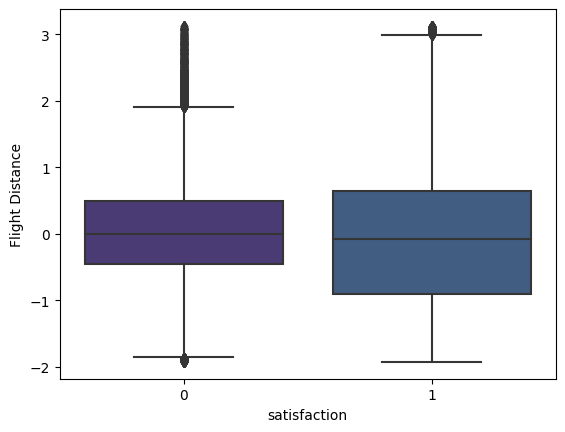

In [145]:
sns.boxplot(y=df['Flight Distance'], x=df.satisfaction)
plt.show()